#To Do:

* fix the folder names in Google Drive:

    Apple(1)/Train -> Apple/Train and so on

* add explainatory comments for yourself and others
* fix and share Google drive with other so that they can run the code on their end as well
* Quickly finish preprocessing (our base data is good) apply a few models and compute the results by Saturday night

#Code

In [ ]:
import os
import numpy as np
from PIL import Image
from google.colab import drive

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# New section

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


# Convert Images to np arrays and create labels

In [ ]:
# Set the paths to the train, test, and validation directories
train_dir = '/content/drive/MyDrive/archive/Tomato (1)/Train'
test_dir = '/content/drive/MyDrive/archive/Tomato (1)/Test'
val_dir = '/content/drive/MyDrive/archive/Tomato (1)/Val'



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(os.listdir(train_dir))

['Septoria Leaf Spot', 'Early Blight', 'Bacterial Spot', 'Healthy', 'Yellow Leaf Curl Virus', 'Late Blight']


In [ ]:

# # Function to read and store images from a directory
# def read_images(directory):
#     images = []
#     labels = []

#     # Iterate over the subdirectories (classes)
#     for class_name in os.listdir(directory):
#         class_dir = os.path.join(directory, class_name)
#         if os.path.isdir(class_dir):
#             # Iterate over the files in the subdirectory
#             for filename in os.listdir(class_dir):
#                 if filename.endswith('.jpg') or filename.endswith('.png'):
#                     # Read the image file
#                     img = Image.open(os.path.join(class_dir, filename))
#                     # Convert the image to a NumPy array
#                     img_array = np.array(img)
#                     # Store the image array
#                     images.append(img_array)
#                     # Store the label
#                     labels.append(class_name)

#     return np.array(images), np.array(labels)

# # Read and store images from the train directory
# train_images, train_labels = read_images(train_dir)

# # Read and store images from the test directory
# test_images, test_labels = read_images(test_dir)

# # Read and store images from the validation directory
# val_images, val_labels = read_images(val_dir)

# # Print the shape of the arrays
# print("Train images shape:", train_images.shape)
# print("Train labels shape:", train_labels.shape)
# print("Test images shape:", test_images.shape)
# print("Test labels shape:", test_labels.shape)
# print("Validation images shape:", val_images.shape)
# print("Validation labels shape:", val_labels.shape)


In [ ]:
for folderName in os.listdir(train_dir):
    print(folderName + '\n')
    # for fileName in os.listdir(train_dir + '/' + folderName):
        # print(fileName)

Septoria Leaf Spot

Early Blight

Bacterial Spot

Healthy

Yellow Leaf Curl Virus

Late Blight



In [ ]:
# images = []
# labels = []


# for folderName in os.listdir(train_dir):
#     # print(folderName + '\n')
#     folder_dir = train_dir + '/' + folderName
#     for fileName in os.listdir(folder_dir):
#         # print(fileName)
#         if fileName.endswith('.JPG'):
#             img = Image.open(folder_dir + '/' + fileName)
#             img_arr = np.array(img)
#             # print(img_arr)
#             images.append(img_arr)
#             labels.append(folderName)

# # print(images)
# # print(labels)

# images = np.array(images)
# labels = np.array(labels)

# # # print(images.shape, labels.shape)
# # # print(images)


In [ ]:
def img_to_array(dir):
    images = []
    labels = []

    for folderName in os.listdir(dir):
        folder_dir = os.path.join(dir, folderName)
        if os.path.isdir(folder_dir):
            for fileName in os.listdir(folder_dir):
                if fileName.endswith('.JPG'):
                    img = Image.open(os.path.join(folder_dir, fileName))
                    resized_img = img.resize((128, 128))
                    img_arr = np.array(resized_img)
                    images.append(img_arr)
                    labels.append(folderName)

    images = np.array(images)
    labels = np.array(labels)

    print(images.shape, labels.shape)

    return images, labels




In [ ]:
# Read and store images from the train directory
train_images, train_labels = img_to_array(train_dir)

# Read and store images from the test directory
test_images, test_labels = img_to_array(test_dir)

# Read and store images from the validation directory
val_images, val_labels = img_to_array(val_dir)

(881, 128, 128, 3) (881,)
(170, 128, 128, 3) (170,)
(0,) (0,)


In [ ]:
# import matplotlib.pyplot as plt

# # Visualize multiple training images with their labels
# def visualize_train_images(train_images, train_labels, num_images=5):
#     fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

#     for i in range(num_images):
#         axes[i].imshow(train_images[i])
#         axes[i].set_title(train_labels[i])
#         axes[i].axis('off')

#     plt.tight_layout()
#     plt.show()

# # Visualize the first 5 training images with labels
# visualize_train_images(train_images, train_labels, num_images=5)


Finished, Reading the images and converting them into np.arrays,
the visualized images prove that it has been done properly

Next Task ->

> * explore and select which pre processing techiniques to apply

> * Normalize -> no, not sure as of now

> * Filters -> don't understand the need yet...

> * Binary Segmentataion -> can use Otsu's Thresholding, check with and without (a few authors used this)

> * rotation -> yes, relevant with respect to data given

> * brightness -> no for now, can reconsider

> * tokenize the labels -> even one-hot-encoding is fine, we have only 4 class of diseases here so 4 bits per label,

> * 10,000 images * 4 bits per labels -> good enough + simple





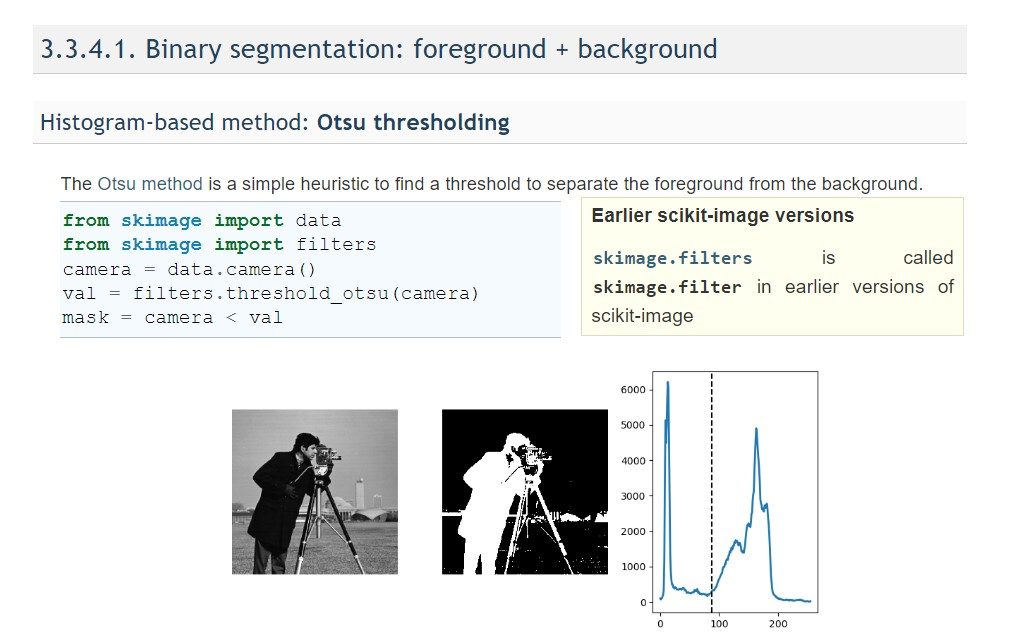

# Encode Labels

In [ ]:
print(train_labels)

['Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spot' 'Septoria Leaf Spot'
 'Septoria Leaf Spot' 'Septoria Leaf Spo

In [ ]:
# Normalize pixel values to the range of 0-1
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
# # Save train_images
# np.save('train_images.npy', train_images)

# # Save val_images
# np.save('val_images.npy', val_images)

# # Save test_images
# np.save('test_images.npy', test_images)


In [ ]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the labels
train_labels = encoder.fit_transform([[label] for label in train_labels]).toarray()
test_labels = encoder.fit_transform([[label] for label in test_labels]).toarray()
val_labels = encoder.fit_transform([[label] for label in val_labels]).toarray()

ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
print(train_labels)

In [ ]:
# # Save train_images
# np.save('train_labels.npy', train_labels)

# # Save val_images
# np.save('val_labels.npy', val_labels)

# # Save test_images
# np.save('test_labels.npy', test_labels)

In [ ]:
# import numpy as np
# from keras.preprocessing.image import ImageDataGenerator

# # Assuming 'train_images' and 'train_labels' are your NumPy arrays

# # Create an instance of ImageDataGenerator
# datagen = ImageDataGenerator(
#     rotation_range=60,  # Rotation range in degrees
#     vertical_flip=True  # Enable vertical flipping
# )

# # Reshape train_images to 4D (required by ImageDataGenerator)
# train_images_4D = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 3)

# # Generate augmented images
# augmented_images = []
# augmented_labels = []
# for img, label in zip(train_images_4D, train_labels):
#     img_batch = np.expand_dims(img, axis=0)
#     aug_iter = datagen.flow(img_batch, batch_size=1)
#     for _ in range(4):  # Generate 4 augmented images for each original image
#         augmented_img = next(aug_iter)[0].astype(np.uint8)
#         augmented_images.append(augmented_img)
#         augmented_labels.append(label)

# # Convert augmented images and labels to NumPy arrays
# augmented_images = np.array(augmented_images)
# augmented_labels = np.array(augmented_labels)

# # Reshape augmented_images to 4D (original shape)
# augmented_images = augmented_images.reshape(
#     augmented_images.shape[0], train_images.shape[1], train_images.shape[2], 3
# )

# # Concatenate augmented and original images and labels
# final_train_images = np.concatenate((train_images, augmented_images), axis=0)
# final_train_labels = np.concatenate((train_labels, augmented_labels), axis=0)

# # Shuffle the data
# shuffle_indices = np.random.permutation(final_train_images.shape[0])
# final_train_images = final_train_images[shuffle_indices]
# final_train_labels = final_train_labels[shuffle_indices]

# -------NOTICE----------------------------------------------------------------------------------

# caused colab to crash due to insufficient memory
# will proceed with original data for now
# will create the augmented data in parts, as it is very relevant to improving accuracy (i think)
# can use CHUNKING -> https://pythonspeed.com/articles/chunking-pandas/
# also I can resize from 256 x 256 to 128 x 128

# Train Model

In [ ]:
# # Fetch the saved np arrays

# # Load the .npy file
# test_images = np.load('/content/drive/MyDrive/archive/Apple (1)/test_images.npy')
# test_labels = np.load('/content/drive/MyDrive/archive/Apple (1)/test_labels.npy')

# train_images = np.load('/content/drive/MyDrive/archive/Apple (1)/train_images.npy')
# train_labels = np.load('/content/drive/MyDrive/archive/Apple (1)/train_labels.npy')

# val_images = np.load('/content/drive/MyDrive/archive/Apple (1)/val_images.npy')
# val_labels = np.load('/content/drive/MyDrive/archive/Apple (1)/val_labels.npy')

In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# import os

# # Define the number of classes
# num_classes = 3

# # Create a CNN model
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(num_classes, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.CategoricalCrossentropy(),
#               metrics=['accuracy'])

# # Define callbacks
# early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(factor=0.1, patience=2)
# model_dir = './saved_models'
# if not os.path.exists(model_dir):
#     os.makedirs(model_dir)
# model_checkpoint = ModelCheckpoint(os.path.join(model_dir, 'model_{epoch:02d}.h5'), save_best_only=False)

# # Initialize lists to store metrics at each epoch
# accuracy_list = []
# loss_list = []

# # Train the model with callbacks
# for epoch in range(1, 31):
#     print(f'Epoch {epoch}/30')
#     history = model.fit(train_images, train_labels, epochs=1, batch_size=16,
#                         validation_data=(val_images, val_labels),
#                         callbacks=[early_stopping, reduce_lr])

#     # Evaluate the model on train data
#     train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)
#     accuracy_list.append(round(train_accuracy, 6))
#     loss_list.append(round(train_loss, 6))

#     print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')

# # Evaluate the final model on test data
# test_loss, test_accuracy = model.evaluate(test_images, test_labels)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Retrieve training history
# training_loss = history.history['loss']
# validation_loss = history.history['val_loss']
# training_accuracy = history.history['accuracy']
# validation_accuracy = history.history['val_accuracy']

# # Convert training history to lists
# training_loss_list = list(training_loss)
# validation_loss_list = list(validation_loss)
# training_accuracy_list = list(training_accuracy)
# validation_accuracy_list = list(validation_accuracy)


In [ ]:
from keras.callbacks import ModelCheckpoint
import os

# Define the number of classes
num_classes = 6

# Create a CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=2)
model_dir = './saved_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
model_checkpoint = ModelCheckpoint(os.path.join(model_dir, 'model_{epoch:02d}.h5'), save_best_only=False)

# Train the model with callbacks
history = model.fit(train_images, train_labels, epochs=20, batch_size=32,
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stopping, reduce_lr, model_checkpoint])

# Evaluate each model on test data
model_files = sorted(os.listdir(model_dir))
for model_file in model_files:
    model = tf.keras.models.load_model(os.path.join(model_dir, model_file))
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f'Model: {model_file}, Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Retrieve training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Convert training history to lists
training_loss_list = list(training_loss)
validation_loss_list = list(validation_loss)
training_accuracy_list = list(training_accuracy)
validation_accuracy_list = list(validation_accuracy)


In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# import os
# from keras.regularizers import l2

# # Define the number of classes
# num_classes = 3

# # Create a CNN model with regularization
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 128, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
# model.add(layers.Dropout(0.5))  # Dropout layer with a dropout rate of 0.5
# model.add(layers.Dense(num_classes, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.CategoricalCrossentropy(),
#               metrics=['accuracy'])

# # Define callbacks
# early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(factor=0.1, patience=2)
# model_dir = './saved_models'
# if not os.path.exists(model_dir):
#     os.makedirs(model_dir)
# model_checkpoint = ModelCheckpoint(os.path.join(model_dir, 'model_{epoch:02d}.h5'), save_best_only=False)

# # Train the model with callbacks
# history = model.fit(train_images, train_labels, epochs=20, batch_size=32,
#                     validation_data=(val_images, val_labels),
#                     callbacks=[early_stopping, reduce_lr, model_checkpoint])

# # Evaluate each model on test data
# model_files = sorted(os.listdir(model_dir))
# for model_file in model_files:
#     model = tf.keras.models.load_model(os.path.join(model_dir, model_file))
#     test_loss, test_accuracy = model.evaluate(test_images, test_labels)
#     print(f'Model: {model_file}, Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# # Retrieve training history
# training_loss = history.history['loss']
# validation_loss = history.history['val_loss']
# training_accuracy = history.history['accuracy']
# validation_accuracy = history.history['val_accuracy']

# # Convert training history to lists
# training_loss_list = list(training_loss)
# validation_loss_list = list(validation_loss)
# training_accuracy_list = list(training_accuracy)
# validation_accuracy_list = list(validation_accuracy)


In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy_list, label='Training Accuracy')
plt.plot(validation_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss_list, label='Training Loss')
plt.plot(validation_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
import os
import matplotlib.pyplot as plt

# Directory containing saved models
model_dir = './saved_models'

# List to store test loss and accuracy for each model
test_loss_list = []
test_accuracy_list = []
model_names = []

# Iterate through each model file
for model_file in sorted(os.listdir(model_dir)):
    # Load the model
    model = tf.keras.models.load_model(os.path.join(model_dir, model_file))

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    test_loss_list.append(test_loss)
    test_accuracy_list.append(test_accuracy)
    model_names.append(model_file)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracy_list, color='pink', label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Test Accuracy of Each Model')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(model_names, test_loss_list, color='cyan', label='Test Loss')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title('Test Loss of Each Model')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Load the best model from the saved models directory
best_model_path = os.path.join(model_dir, 'model_09.h5')
best_model = tf.keras.models.load_model(best_model_path)

# Get predictions for test data
predictions = best_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = np.argmax(test_labels, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Class 0', 'Class 1', 'Class 2'], title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Class 0', 'Class 1', 'Class 2'], normalize=True, title='Normalized confusion matrix')

plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Get predicted probabilities for each class
predicted_probabilities = best_model.predict(test_images)

# Compute ROC curve and ROC area for each class
n_classes = predicted_probabilities.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predicted_probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=lw, label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Micro-average Area under the ROC curve (AUC):", roc_auc["micro"])


In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Get predicted probabilities for each class
predicted_probabilities = best_model.predict(test_images)

# Compute ROC curve and ROC area for each class
n_classes = predicted_probabilities.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predicted_probabilities.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=lw, label='Micro-average ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Micro-average Area under the ROC curve (AUC):", roc_auc["micro"])


In [ ]:
from sklearn.metrics import accuracy_score

# Get predicted labels for test data
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute macro-average precision, recall, and F1 score
macro_precision = precision_score(true_labels, predicted_labels, average='macro')
macro_recall = recall_score(true_labels, predicted_labels, average='macro')
macro_f1 = f1_score(true_labels, predicted_labels, average='macro')

# Compute micro-average precision, recall, and F1 score
micro_precision = precision_score(true_labels, predicted_labels, average='micro')
micro_recall = recall_score(true_labels, predicted_labels, average='micro')
micro_f1 = f1_score(true_labels, predicted_labels, average='micro')

print("Macro-average Precision:", macro_precision)
print("Macro-average Recall:", macro_recall)
print("Macro-average F1 Score:", macro_f1)
print("Micro-average Precision:", micro_precision)
print("Micro-average Recall:", micro_recall)
print("Micro-average F1 Score:", micro_f1)


In [ ]:
from sklearn.metrics import cohen_kappa_score

# Compute Cohen's Kappa
kappa = cohen_kappa_score(true_labels, predicted_labels)
print("Cohen's Kappa:", kappa)


In [ ]:
from sklearn.metrics import log_loss

# Compute log loss
logloss = log_loss(true_labels, predicted_probabilities)
print("Log Loss (Cross-Entropy Loss):", logloss)
